In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# from matplotlib import style

# style.use('ggplot')        

In [2]:
df = pd.read_csv('market_data.csv')
df.head()

,date,path_of_least_resistance_price,trade_cycle_state_price,path_of_least_resistance_colors,trade_cycle_colors
0,2018-11-19,269.10,269.10,"rgb(255, 224, 224)","rgb(192, 192, 192)"
1,2018-11-20,264.12,264.12,"rgb(255, 48, 48)","rgb(255, 48, 48)"
2,2018-11-21,265.02,265.02,"rgb(255, 48, 48)","rgb(255, 48, 48)"
3,2018-11-23,263.25,263.25,"rgb(255, 48, 48)","rgb(255, 48, 48)"
4,2018-11-26,267.50,267.50,"rgb(255, 48, 48)","rgb(255, 48, 48)"


In [3]:
# Convert "date" column to datetime format and set it as index.
df['date'] = pd.to_datetime(df['date'])

In [4]:
# Split each "colors" column into 3 separate columns
df[['r1', 'g1', 'b1']] = df['path_of_least_resistance_colors'].str[3:].apply(lambda x: pd.Series(eval(x)))
df[['r2', 'g2', 'b2']] = df['trade_cycle_colors'].str[3:].apply(lambda x: pd.Series(eval(x)))
df.drop('path_of_least_resistance_colors', axis=1, inplace=True)
df.drop('trade_cycle_colors', axis=1, inplace=True)


In [5]:
# Downsample the dataframe to 1 hour intervals (to avoid gaps in plot) and interpolate values
df = df.set_index('date').resample('H').interpolate().reset_index()

In [6]:
# Convert rgb to hex
df['rgb1'] = df.loc[:, 'r1':'b1'].apply(lambda x: '#%02x%02x%02x' % tuple(x.astype(int)), axis=1)
df['rgb2'] = df.loc[:, 'r2':'b2'].apply(lambda x: '#%02x%02x%02x' % tuple(x.astype(int)), axis=1)

Text(0.5, 1.0, 'SPY Daily Chart')

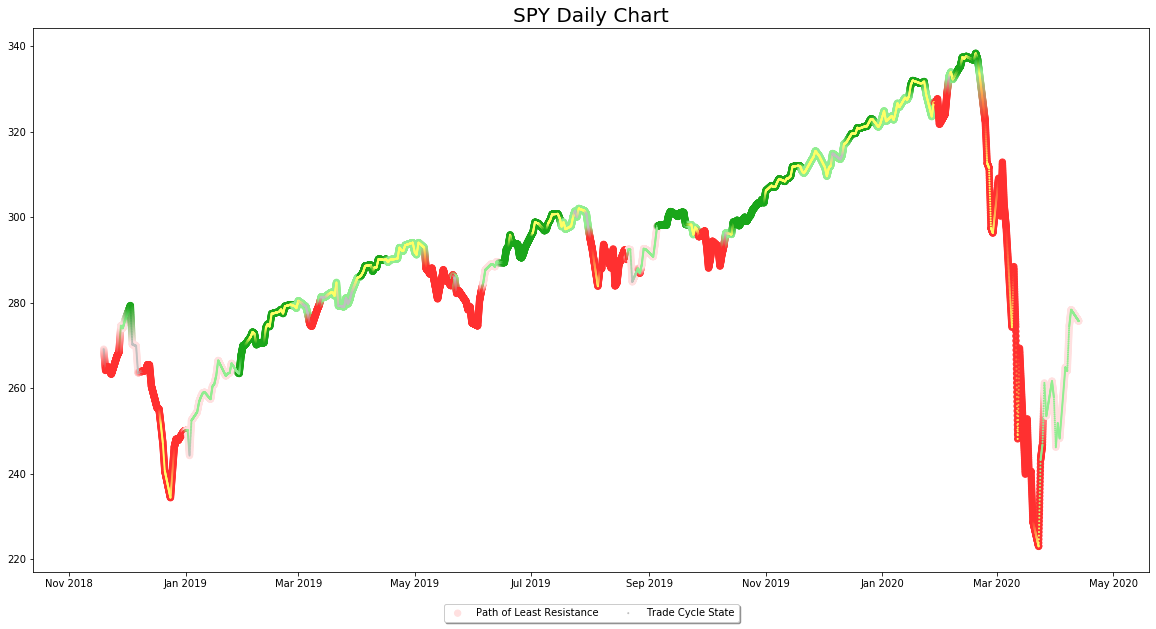

In [7]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()

# Set points size with s
ax.scatter(x=df['date'], y=df['path_of_least_resistance_price'], c=df['rgb1'], s=40, label="Path of Least Resistance")
# Uncomment to see the second line (It doesn't look )
ax.scatter(x=df['date'], y=df['trade_cycle_state_price'], c=df['rgb2'], s=1, label="Trade Cycle State")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow = True, ncol = 2)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.title('SPY Daily Chart',  fontsize=20)

In [8]:
df.head()

,date,path_of_least_resistance_price,trade_cycle_state_price,r1,g1,b1,r2,g2,b2,rgb1,rgb2
0,2018-11-19 00:00:00,269.1000,269.1000,255.0,224.000000,224.000000,192.000,192.0,192.0,#ffe0e0,#c0c0c0
1,2018-11-19 01:00:00,268.8925,268.8925,255.0,216.666667,216.666667,194.625,186.0,186.0,#ffd8d8,#c2baba
2,2018-11-19 02:00:00,268.6850,268.6850,255.0,209.333333,209.333333,197.250,180.0,180.0,#ffd1d1,#c5b4b4
3,2018-11-19 03:00:00,268.4775,268.4775,255.0,202.000000,202.000000,199.875,174.0,174.0,#ffcaca,#c7aeae
4,2018-11-19 04:00:00,268.2700,268.2700,255.0,194.666667,194.666667,202.500,168.0,168.0,#ffc2c2,#caa8a8
